In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('../out/Univariate_Wikipedia.csv')

In [4]:
train.head()

,Date,Average_Users
0,7/1/2015,1024.882127
1,7/2/2015,1031.233602
2,7/3/2015,973.123388
3,7/4/2015,1003.791022
4,7/5/2015,1044.341920


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           550 non-null    object 
 1   Average_Users  550 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [9]:
train["Date"] = pd.to_datetime(train["Date"], dayfirst=True)

In [10]:
# Split date in final_df
train["Year"] = train["Date"].dt.year
train["Month"] = train["Date"].dt.month
train["Week"] = train["Date"].dt.isocalendar().week
train["Day of the week"]= train["Date"].dt.day_name()
train['Month_name'] = train['Date'].dt.month_name()

In [11]:
train.head()

,Date,Average_Users,Year,Month,Week,Day of the week,Month_name
0,2015-01-07,1024.882127,2015,1,2,Wednesday,January
1,2015-02-07,1031.233602,2015,2,6,Saturday,February
2,2015-03-07,973.123388,2015,3,10,Saturday,March
3,2015-04-07,1003.791022,2015,4,15,Tuesday,April
4,2015-05-07,1044.341920,2015,5,19,Thursday,May


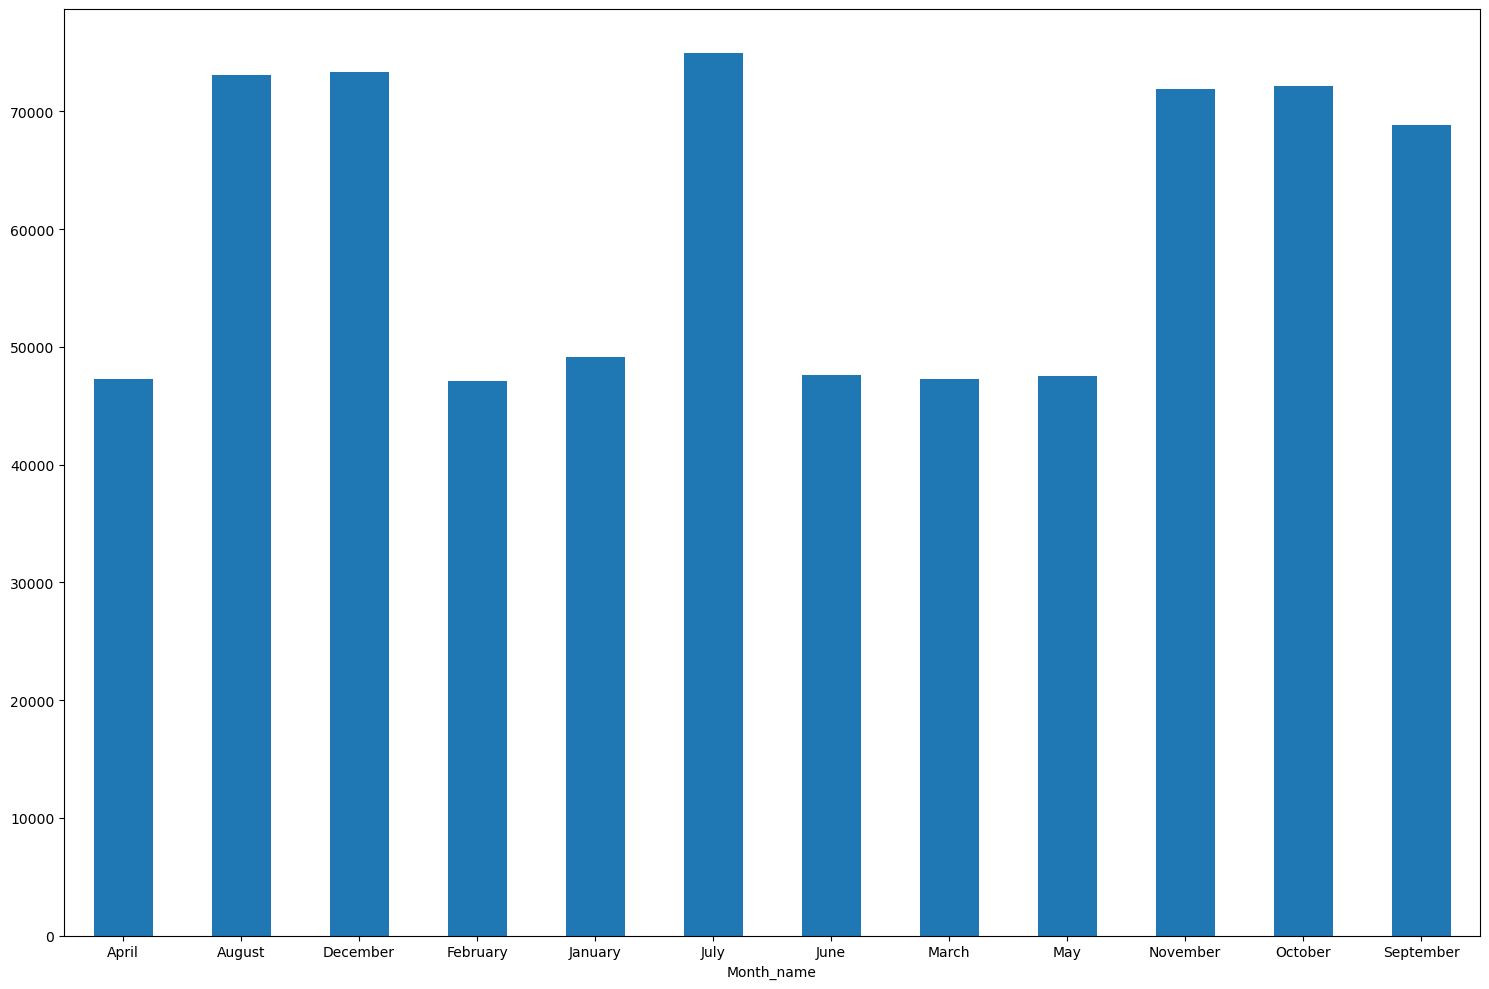

In [13]:
plt.figure(figsize=(15,10))
train.groupby('Month_name').sum()['Average_Users'].plot.bar()

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [15]:
# Traffic by week
traffic_2015 = train[train['Year']==2015].groupby('Week')['Average_Users'].mean()
traffic_2016 = train[train['Year']==2016].groupby('Week')['Average_Users'].mean()

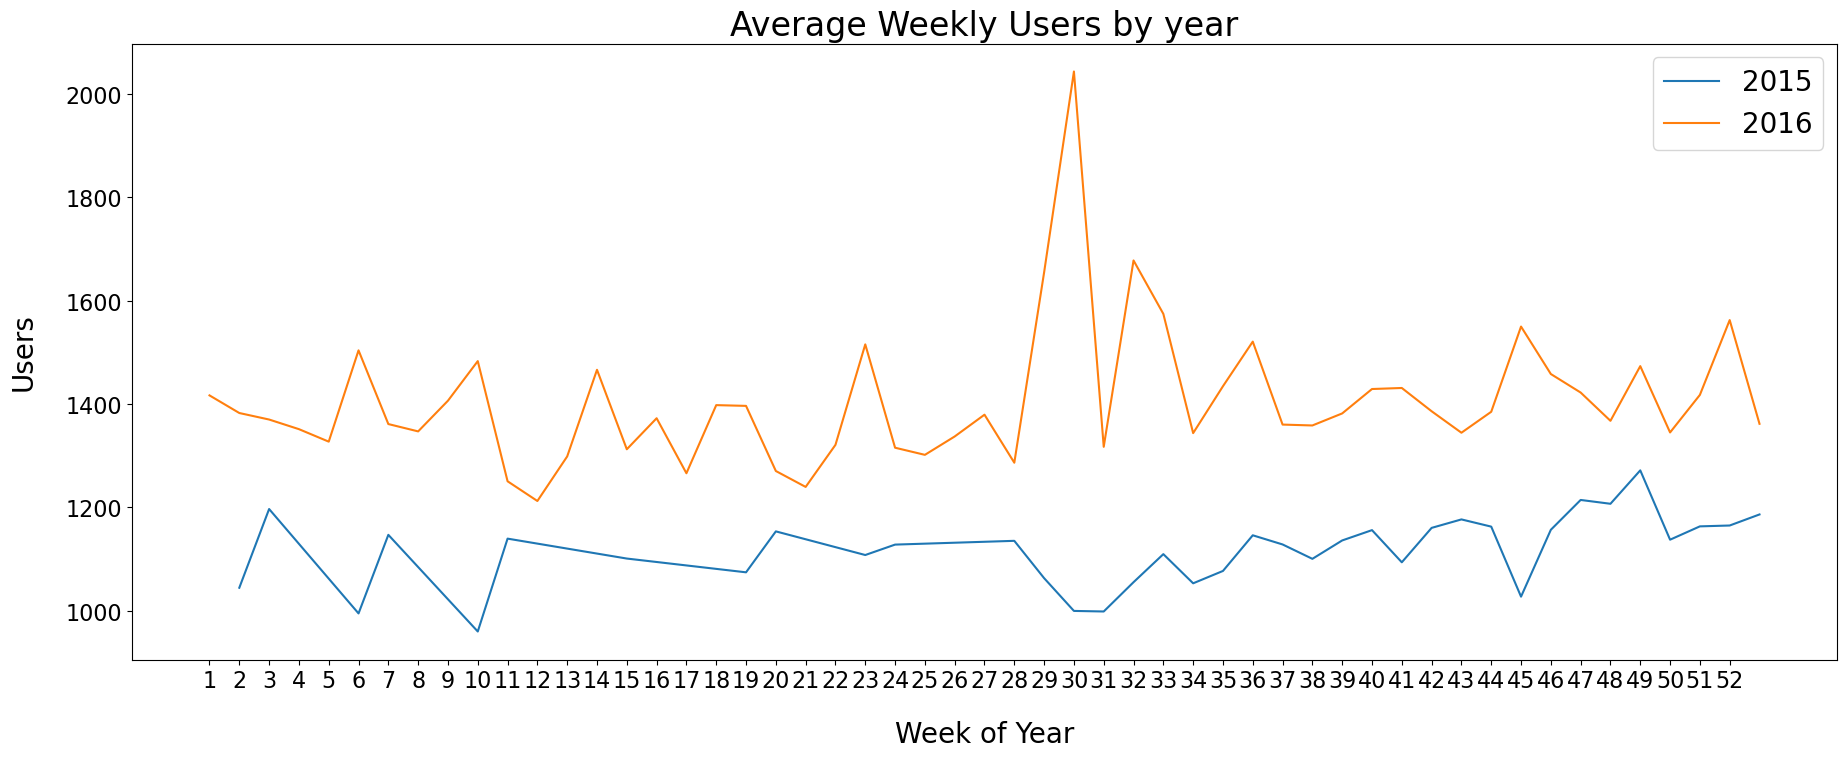

In [16]:
plt.figure(figsize=(22,8))
plt.plot(traffic_2015.index, traffic_2015.values)
plt.plot(traffic_2016.index, traffic_2016.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Users', fontsize=20, labelpad=20)

plt.title("Average Weekly Users by year", fontsize=24)
plt.legend(['2015', '2016'], fontsize=20)

In [17]:
train.shape

(550, 7)

In [18]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(train['Average_Users'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.4366326949128574
p-value: 0.1316628509144071
